In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
df= pd.read_csv(r'/Users/binodrai/Desktop/projects/capstone/capstone.csv')

EDA :Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often using visual methods. 
The purpose of EDA is to discover patterns, detect anomalies, test hypotheses, and check assumptions. 
It helps in understanding the data structure and guides further data processing and analysis.

In [5]:
df.head()
#By default, it returns the first 5 rows of the Dataframe. 
#To change the default, you may insert a value between the parenthesis to change the number of rows returned.

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0


In [6]:
df.tail()
#By default, it returns the last 5 rows of the Dataframe. This function is used to get the last n rows. 
#This function returns the last n rows from the object based on position.

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
4494,735.290161,85,4,25,578,35,Female,Credit,ATM,Grocery,0
4495,610.497814,59,23,18,451,59,Male,Prepaid,ATM,Grocery,0
4496,488.689498,74,5,11,526,9,Male,Credit,In-store,Clothing,0
4497,134.048944,85,0,8,542,10,Male,Credit,In-store,Clothing,0
4498,262.071685,55,9,14,309,45,Male,Credit,ATM,Entertainment,0


In [4]:
df.describe().round(3)
#Return a statistical summary for numerical columns present in the dataset.

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,496.905,53.644,11.648,14.387,574.325,50.042,0.255
std,289.265,20.903,6.915,8.551,159.100,28.685,0.436
min,1.012,18.000,0.000,0.000,300.000,1.000,0.000
25%,244.041,35.000,6.000,7.000,434.000,25.000,0.000
50%,500.901,54.000,12.000,14.000,576.000,50.000,0.000
75%,744.026,72.000,18.000,22.000,711.000,75.000,1.000
max,999.718,89.000,23.000,29.000,849.000,99.000,1.000


In [7]:
df.info( )
#It helps in getting a quick overview of the dataset like datatypes, memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   transaction_amount           4499 non-null   float64
 1   age                          4499 non-null   int64  
 2   transaction_hour             4499 non-null   int64  
 3   days_since_last_transaction  4499 non-null   int64  
 4   credit_score                 4499 non-null   int64  
 5   number_of_transactions       4499 non-null   int64  
 6   gender                       4499 non-null   object 
 7   card_type                    4499 non-null   object 
 8   transaction_type             4499 non-null   object 
 9   merchant_category            4499 non-null   object 
 10  is_fraud                     4499 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 386.8+ KB


In [8]:
df.isnull( ).sum( )
#Return the number of missing values in each column.

transaction_amount             0
age                            0
transaction_hour               0
days_since_last_transaction    0
credit_score                   0
number_of_transactions         0
gender                         0
card_type                      0
transaction_type               0
merchant_category              0
is_fraud                       0
dtype: int64

In [10]:
df.nunique( )
#Return number of unique elements over columns or rows.

transaction_amount             4499
age                              72
transaction_hour                 24
days_since_last_transaction      30
credit_score                    550
number_of_transactions           99
gender                            2
card_type                         3
transaction_type                  3
merchant_category                 5
is_fraud                          2
dtype: int64

In [11]:
df.columns
#Return the column labels of the dataframe.

Index(['transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'gender', 'card_type', 'transaction_type', 'merchant_category',
       'is_fraud'],
      dtype='object')

In [13]:
df.memory_usage( )
#Returns how much memory each column uses in bytes. It is useful especially when we work with large data frames.

Index                            132
transaction_amount             35992
age                            35992
transaction_hour               35992
days_since_last_transaction    35992
credit_score                   35992
number_of_transactions         35992
gender                         35992
card_type                      35992
transaction_type               35992
merchant_category              35992
is_fraud                       35992
dtype: int64

In [27]:
df.dropna( )
#This function is used to remove a row or a column from a dataframe that has a NaN or missing values in it.

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0
...,...,...,...,...,...,...,...,...,...,...,...
4494,735.290161,85,4,25,578,35,Female,Credit,ATM,Grocery,0
4495,610.497814,59,23,18,451,59,Male,Prepaid,ATM,Grocery,0
4496,488.689498,74,5,11,526,9,Male,Credit,In-store,Clothing,0
4497,134.048944,85,0,8,542,10,Male,Credit,In-store,Clothing,0


In [16]:
df.nlargest(5,'credit_score')
#Returns the first n rows ordered by columns in descending order.

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
48,547.163569,30,15,18,849,11,Male,Credit,In-store,Entertainment,0
836,914.931055,71,4,29,849,72,Male,Prepaid,Online,Grocery,0
855,191.497033,31,21,8,849,86,Female,Debit,Online,Entertainment,0
1037,725.042005,19,8,20,849,74,Female,Prepaid,In-store,Travel,0
1118,266.334443,63,15,20,849,37,Female,Credit,In-store,Electronics,0


In [17]:
df.isna( )
#This function returns a dataframe filled with boolean values with true indicating missing values.

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4494,False,False,False,False,False,False,False,False,False,False,False
4495,False,False,False,False,False,False,False,False,False,False,False
4496,False,False,False,False,False,False,False,False,False,False,False
4497,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.duplicated()
#Returns a boolean Series denoting duplicate rows.

0       False
1       False
2       False
3       False
4       False
        ...  
4494    False
4495    False
4496    False
4497    False
4498    False
Length: 4499, dtype: bool

In [19]:
df['card_type'].value_counts()
# This function is used to get a Series containing counts of unique values.
# It excludes missing values by default.
# This function comes in handy when we want to check the problem of class imbalance for a categorical variable.

card_type
Credit     1519
Debit      1500
Prepaid    1480
Name: count, dtype: int64

In [24]:
df.shape
# Since data frames are two-dimensional, what shape returns is the number of rows and columns.

(4499, 11)

In [22]:
df.size
# Returns the number of rows times the number of columns if DataFrame.

49489

In [23]:
df.ndim
# Returns dimension of dataframe/series. 1 for one dimension (series), 2 for two dimensions (dataframe).

2

Why use graphical representation of data?
Enhanced Understanding: Visualizations highlight patterns, trends, and outliers, making complex data more comprehensible.
Identifying Relationships: Graphs reveal relationships between variables that may not be evident through numerical analysis alone.
Simplifying Communication: Visual tools provide a clear way to communicate insights to stakeholders, aiding in effective decision-making.

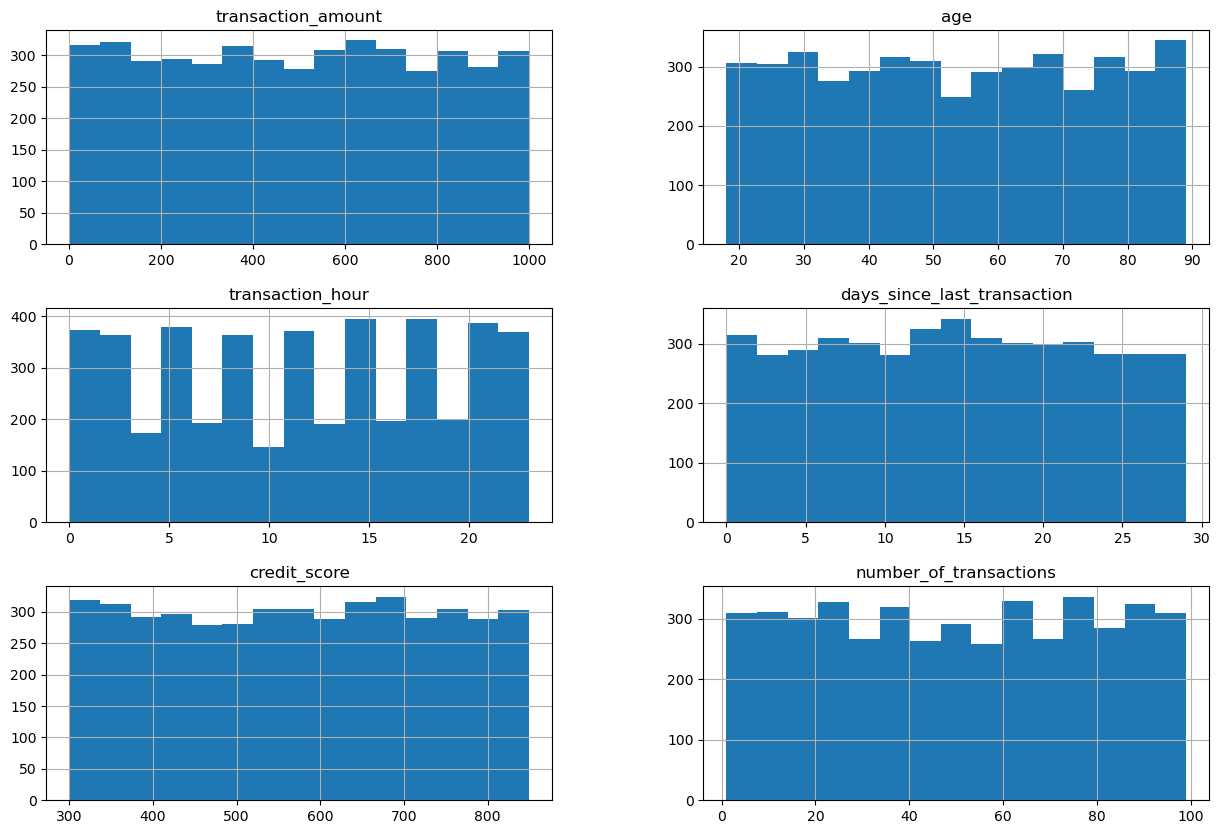

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
numerical_cols = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',	'number_of_transactions']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.show()

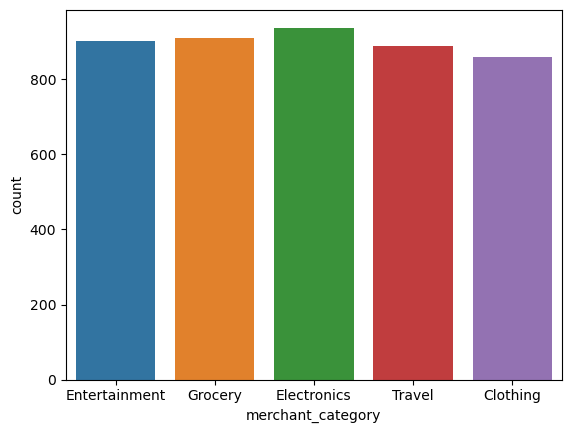

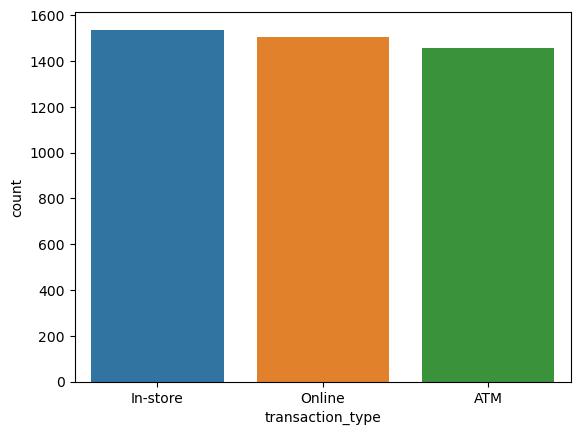

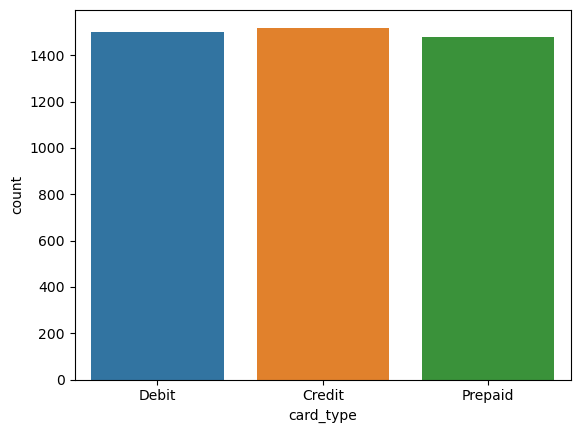

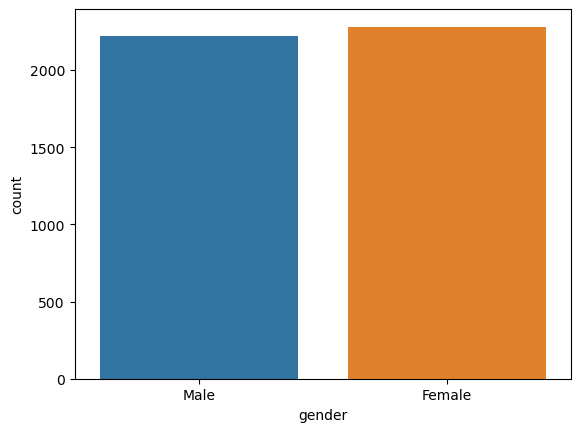

In [28]:
# Bar plot for categorical variables
categorical_cols = ['merchant_category', 'transaction_type' , 'card_type', 'gender']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()

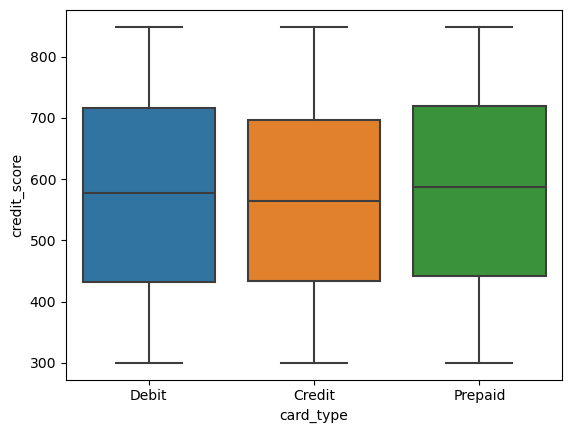

In [31]:
# Scatter plot for numerical variables
# Box plot for loan amount by loan grade
sns.boxplot(x='card_type', y='credit_score', data=df)
plt.show()

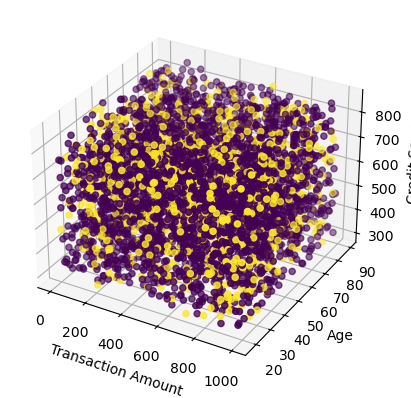

In [32]:
# 3D Scatter plot for three numerical variables
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['transaction_amount'], df['age'], df['credit_score'], c=df['is_fraud'])
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Age')
ax.set_zlabel('Credit Score')
plt.show()

In [34]:
import sweetviz as sv

# Generate the report
report = sv.analyze(df)
report.show_html('capstone_credit_fraud_analysis_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report capstone_credit_fraud_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Feature Engineering

In [35]:
# Define categorical and numerical columns
categorical_cols = ['merchant_category', 'transaction_type' , 'card_type', 'gender']
numerical_cols = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',
                                   'number_of_transactions']

In [36]:
#Step 1:Missing value imputation ( checking missing values)
df.isnull().sum()

transaction_amount             0
age                            0
transaction_hour               0
days_since_last_transaction    0
credit_score                   0
number_of_transactions         0
gender                         0
card_type                      0
transaction_type               0
merchant_category              0
is_fraud                       0
dtype: int64

In [37]:
# There is no missing values in the dataset so this part is skipped.

In [38]:
#Step 2:Outlier removal (capping) 
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Assume df is your original DataFrame
 
# Identify numerical columns
numerical_cols = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',
                                   'number_of_transactions']
 
# Initialize the scaler
scaler = StandardScaler()
 
# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
 
# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)
 
# Merge scaled numerical columns back into the original DataFrame
df[numerical_cols] = scaled_numerical_df
 
# If needed, print the resulting DataFrame
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,-0.420905,0.686878,1.352627,0.422526,0.192823,-0.977689,Male,Debit,In-store,Entertainment,1
1,1.569182,1.643795,1.352627,-1.214808,1.676330,-1.570397,Male,Credit,Online,Grocery,0
2,0.813729,0.543341,0.484824,1.592050,1.167160,-1.221746,Female,Debit,In-store,Entertainment,1
3,0.353193,-0.844188,1.641894,-1.214808,-0.310060,-0.489577,Male,Credit,Online,Entertainment,0
4,-1.175671,-1.466184,-0.382979,0.656431,-1.359830,0.451783,Male,Credit,Online,Entertainment,0
5,-1.175755,-0.461421,1.207993,1.475098,-1.252967,1.497738,Male,Prepaid,Online,Electronics,0
6,-1.513936,0.782570,0.629458,0.539478,0.959721,1.009625,Male,Prepaid,ATM,Electronics,0
7,1.277190,0.543341,-1.684683,1.007288,-0.900948,1.428007,Male,Debit,ATM,Entertainment,1
8,0.361677,-1.418338,0.774091,0.422526,1.399744,-0.036330,Female,Prepaid,In-store,Travel,1
9,0.731105,1.069645,-0.382979,-0.396141,0.186537,0.172861,Male,Prepaid,ATM,Grocery,0


<!-- Why feature scaling and capping?
Improved Model Performance: Capping outliers prevents extreme values from disproportionately influencing machine learning models, leading to more accurate predictions.
Stable Statistical Analysis: Reducing the impact of outliers ensures more reliable and consistent statistical summaries, enhancing data analysis.
Balanced Feature Contribution: Standard scaling ensures that all features contribute equally to the analysis, preventing features with larger ranges from dominating the results. -->

In [39]:
#now checking if it is scaled and capped
df.describe().round(3)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.255
std,1.000,1.000,1.000,1.000,1.000,1.000,0.436
min,-1.715,-1.705,-1.685,-1.683,-1.724,-1.710,0.000
25%,-0.874,-0.892,-0.817,-0.864,-0.882,-0.873,0.000
50%,0.014,0.017,0.051,-0.045,0.011,-0.001,0.000
75%,0.854,0.878,0.919,0.890,0.859,0.870,1.000
max,1.738,1.692,1.642,1.709,1.727,1.707,1.000


In [40]:
#Step 3: convert categorical into numerical by ordinal and one hot encoding
#Since we dont have ordinal column.
# Apply One-Hot Encoding for 'merchant_category', 'transaction_type' , 'card_type', 'gender'
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
#check categorical are converted
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel,transaction_type_In-store,transaction_type_Online,card_type_Debit,card_type_Prepaid,gender_Male
0,-0.420905,0.686878,1.352627,0.422526,0.192823,-0.977689,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.569182,1.643795,1.352627,-1.214808,1.676330,-1.570397,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.813729,0.543341,0.484824,1.592050,1.167160,-1.221746,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.353193,-0.844188,1.641894,-1.214808,-0.310060,-0.489577,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.175671,-1.466184,-0.382979,0.656431,-1.359830,0.451783,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,-1.175755,-0.461421,1.207993,1.475098,-1.252967,1.497738,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
6,-1.513936,0.782570,0.629458,0.539478,0.959721,1.009625,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,1.277190,0.543341,-1.684683,1.007288,-0.900948,1.428007,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.361677,-1.418338,0.774091,0.422526,1.399744,-0.036330,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,0.731105,1.069645,-0.382979,-0.396141,0.186537,0.172861,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


<!-- Feature creation: After feature engineering we do feature creation.WHY features are created?
Enhancing Predictive Power: Generating new variables or transforming existing ones to improve model accuracy.
Capturing Hidden Patterns: Uncovering underlying relationships in data for more insightful analysis and better outcomes.
#Since there are no such columns where we can create new column we are using same data set --> -->

In [42]:
#Feature Selection
# Calculate correlation coefficients between numerical features and the target variable
numerical_features = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',
                                   'number_of_transactions']
correlations = df[numerical_features + ['is_fraud']].corr()['is_fraud'].sort_values()

In [46]:
correlations
# Understanding these ranges helps in determining the strength and direction of relationships between variables, 
# aiding in feature selection and data analysis.

transaction_hour               0.000014
age                            0.001507
transaction_amount             0.002242
days_since_last_transaction    0.005217
number_of_transactions         0.008564
credit_score                   0.011210
is_fraud                       1.000000
Name: is_fraud, dtype: float64

In [44]:
# Calculate Information Value (IV) for categorical columns
# Measures the predictive power of features relative to the target variable (is_fraud). 
def calculate_iv(df, feature, target):
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 0)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        })
    iv_df = pd.DataFrame(lst)
    iv_df['Share'] = iv_df['All'] / iv_df['All'].sum()
    iv_df['Bad Rate'] = iv_df['Bad'] / iv_df['All']
    iv_df['Good Rate'] = iv_df['Good'] / iv_df['All']
    iv_df['WOE'] = np.log(iv_df['Good Rate'] / iv_df['Bad Rate'])
    iv_df['IV'] = (iv_df['Good Rate'] - iv_df['Bad Rate']) * iv_df['WOE']
    iv = iv_df['IV'].sum()
    return iv

categorical_features = ['merchant_category_Electronics', 'transaction_type_In-store' ,'transaction_type_Online', 'card_type_Debit','card_type_Prepaid', 
                        'gender_Male','merchant_category_Entertainment',
                        'merchant_category_Grocery','merchant_category_Travel']

print("\nInformation Value (IV) for categorical features:")
for feature in categorical_features:
    iv = calculate_iv(df, feature, 'is_fraud')
    print(f"{feature}: {iv}")


Information Value (IV) for categorical features:
merchant_category_Electronics: 1.050383089232602
transaction_type_In-store: 1.055418016315334
transaction_type_Online: 1.098955813690369
card_type_Debit: 1.0471428178888444
card_type_Prepaid: 1.0302016526469204
gender_Male: 1.049315784363943
merchant_category_Entertainment: 1.0221451700670983
merchant_category_Grocery: 1.0904719610974327
merchant_category_Travel: 1.041568142544516


In [45]:
#CHECKING TO KNOW THE DATA INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   transaction_amount               4499 non-null   float64
 1   age                              4499 non-null   float64
 2   transaction_hour                 4499 non-null   float64
 3   days_since_last_transaction      4499 non-null   float64
 4   credit_score                     4499 non-null   float64
 5   number_of_transactions           4499 non-null   float64
 6   is_fraud                         4499 non-null   int64  
 7   merchant_category_Electronics    4499 non-null   float64
 8   merchant_category_Entertainment  4499 non-null   float64
 9   merchant_category_Grocery        4499 non-null   float64
 10  merchant_category_Travel         4499 non-null   float64
 11  transaction_type_In-store        4499 non-null   float64
 12  transaction_type_Onl

Model Building

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
    
    
#define features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Find class ratio
class_ratio = y.value_counts(normalize=True)
print(f"Class ratio:\n{class_ratio}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
# SMOTE Application: Handle class imbalance by generating synthetic samples, improving the model's ability to learn from the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#Check class ratio after resampling
class_ratio_resampled = y_train.value_counts(normalize=True)
print(f"Class ratio after SMOTE:\n{class_ratio_resampled}")

Class ratio:
is_fraud
0    0.744832
1    0.255168
Name: proportion, dtype: float64
Class ratio after SMOTE:
is_fraud
0    0.5
1    0.5
Name: proportion, dtype: float64


In [49]:
# List of models to evaluate
# Testing multiple machine learning algorithms is crucial to identify the best model for a given problem.
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Support Vector Machine': SVC(probability=True)
}

# Evaluate each model and print the classification report
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61       996
           1       0.25      0.43      0.31       354

    accuracy                           0.51      1350
   macro avg       0.48      0.48      0.46      1350
weighted avg       0.60      0.51      0.53      1350

------------------------------------------------------------
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.73      0.52      0.61       996
           1       0.26      0.47      0.33       354

    accuracy                           0.50      1350
   macro avg       0.49      0.49      0.47      1350
weighted avg       0.61      0.50      0.53      1350

------------------------------------------------------------
Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.74      

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Bagging Classifier
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)

# Evaluate Bagging model at various cutoff levels
cutoff_levels = [0.3, 0.4, 0.5, 0.6, 0.7]
for cutoff in cutoff_levels:
    y_pred_proba = bagging_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= cutoff).astype(int)
    print(f"Classification Report for Bagging Classifier at cutoff {cutoff}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Classification Report for Bagging Classifier at cutoff 0.3:
              precision    recall  f1-score   support

           0       0.73      0.41      0.52       996
           1       0.26      0.57      0.35       354

    accuracy                           0.45      1350
   macro avg       0.49      0.49      0.44      1350
weighted avg       0.60      0.45      0.48      1350

------------------------------------------------------------
Classification Report for Bagging Classifier at cutoff 0.4:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       996
           1       0.26      0.38      0.31       354

    accuracy                           0.55      1350
   macro avg       0.50      0.50      0.49      1350
weighted avg       0.61      0.55      0.57      1350

------------------------------------------------------------
Classification Report for Bagging Classifier at cutoff 0.5:
              precision    recall  f1-score 

<!-- By adjusting the cutoff levels, we can tailor the model to meet specific business requirements and optimize its performance. 
the Bagging Classifier at various cutoff levels is a crucial step to understand the trade-offs between different performance metrics like precision, recall, and F1-score. -->

Hyper parameter

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],           # Number of base estimators
    'max_samples': [0.5, 1.0],               # Fraction of samples to draw from X to train each base estimator
    'max_features': [0.5, 1.0],              # Fraction of features to draw from X to train each base estimator
    'bootstrap': [True, False],              # Whether samples are drawn with replacement
    'bootstrap_features': [True, False]      # Whether features are drawn with replacement
}

# Initialize the Bagging Classifier
bagging = BaggingClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best estimator
best_bagging = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_bagging.predict(X_test)
print("Classification Report for the best Bagging Classifier:")
print(classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Classification Report for the best Bagging Classifier:
              precision    recall  f1-score   support

           0       0.74      0.99      0.84       996
           1       0.21      0.01      0.02       354

    accuracy                           0.73      1350
   macro avg       0.48      0.50      0.43      1350
weighted avg       0.60      0.73      0.63      1350



ROC AUC Score: 0.46936900142944665


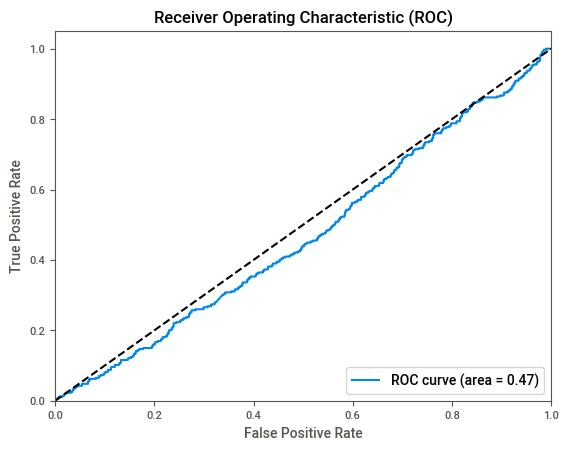

In [68]:
# Optionally, you can also plot the ROC Curve
# Calculate ROC AUC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# An ROC AUC score of 0.469 indicates that the model is not performing well and is worse than random guessing. 
# It is essential to revisit the data, features, model choice, and training process to diagnose and address the underlying issues. 
# Improving these aspects should lead to a better-performing model.

In [52]:
#CROSS VALIDATION
# The cross-validation output for the Bagging Classifier suggests a stable and reasonably accurate model with a mean accuracy of 80%. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize the Bagging Classifier
bagging_model = BaggingClassifier()

# Perform cross-validation
cv_scores_bagging = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and their mean
print("Cross-validation scores for Bagging Classifier: ", cv_scores_bagging)
print("Mean cross-validation score for Bagging Classifier: ", cv_scores_bagging.mean())

Cross-validation scores for Bagging Classifier:  [0.59235669 0.69214437 0.89808917 0.90764331 0.89808917]
Mean cross-validation score for Bagging Classifier:  0.7976645435244161


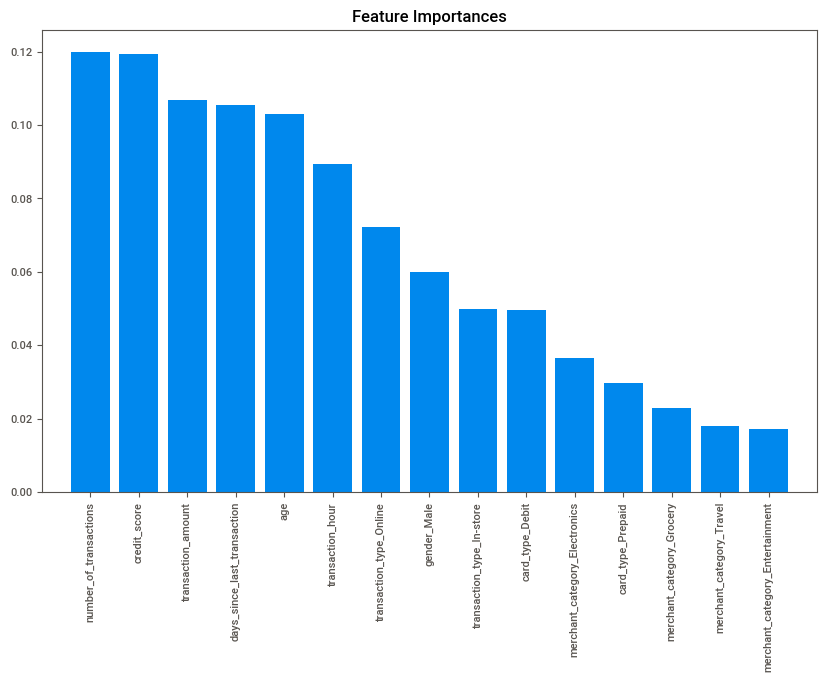

In [53]:
# Fit the Bagging Classifier to the training data
bagging_model.fit(X_train, y_train)

# Get feature importances
# Note: BaggingClassifier does not have a feature_importances_ attribute directly
# We can get feature importances from the base estimators (e.g., decision trees)

# Initialize an array to hold the importances
feature_importances = np.zeros(X_train.shape[1])

# Loop over all base estimators
for estimator in bagging_model.estimators_:
    # Check if the estimator has feature_importances_ attribute (e.g., decision trees)
    if hasattr(estimator, "feature_importances_"):
        feature_importances += estimator.feature_importances_

# Average the feature importances
feature_importances /= len(bagging_model.estimators_)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [54]:
# It shows that no_of_transaction and credit_scores feature of high importance whereas, merchant_category_Entertainment is least relevant feature.
# Feature importance is a crucial aspect of machine learning that helps in understanding, improving, and interpreting models.
# By identifying the most significant features, it aids in model transparency, performance enhancement, and gaining valuable insights from the data.

Prediction on unknown data 

In [56]:
import pandas as pd

# Define the path to the dataset
dataset_path = (r'/Users/binodrai/Desktop/projects/capstone/capstone_prediction.csv')

# Load the dataset into a pandas DataFrame
df_predict = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
df_predict.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category
0,419.680373,79,4,13,691,82,Female,Prepaid,In-store,Travel
1,599.699988,24,0,0,347,15,Male,Credit,ATM,Travel
2,514.194147,88,22,16,503,30,Female,Credit,In-store,Entertainment
3,288.896341,67,10,0,456,48,Male,Debit,Online,Grocery
4,7.457893,69,23,22,325,96,Female,Credit,ATM,Entertainment
5,496.742983,43,23,28,720,40,Female,Prepaid,ATM,Grocery
6,286.340363,43,6,20,563,91,Female,Credit,Online,Clothing
7,734.873692,36,17,21,828,91,Male,Credit,Online,Electronics
8,24.922319,26,20,12,769,83,Female,Prepaid,ATM,Electronics
9,585.242983,78,19,29,553,74,Male,Debit,In-store,Travel


In [ ]:
# Same steps are followed for this dataset also missing value imputation, otliers removal, feature scaling, one hot encoding.

In [57]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming df_predict is your DataFrame
# Separate the numeric and categorical columns
numeric_cols = df_predict.select_dtypes(include=['number']).columns
categorical_cols = df_predict.select_dtypes(exclude=['number']).columns

# Initialize the KNN Imputer for numeric columns
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numeric columns
imputed_numeric_data = knn_imputer.fit_transform(df_predict[numeric_cols])

# Convert the imputed numeric data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Initialize the Simple Imputer for categorical columns
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
imputed_categorical_data = most_frequent_imputer.fit_transform(df_predict[categorical_cols])

# Convert the imputed categorical data back to a DataFrame
df_imputed_categorical = pd.DataFrame(imputed_categorical_data, columns=categorical_cols)

# Combine the imputed numeric and categorical columns back into a single DataFrame
df = pd.concat([df_imputed_numeric, df_imputed_categorical.reset_index(drop=True)], axis=1)

df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category
0,419.680373,79.0,4.0,13.0,691.0,82.0,Female,Prepaid,In-store,Travel
1,599.699988,24.0,0.0,0.0,347.0,15.0,Male,Credit,ATM,Travel
2,514.194147,88.0,22.0,16.0,503.0,30.0,Female,Credit,In-store,Entertainment
3,288.896341,67.0,10.0,0.0,456.0,48.0,Male,Debit,Online,Grocery
4,7.457893,69.0,23.0,22.0,325.0,96.0,Female,Credit,ATM,Entertainment
5,496.742983,43.0,23.0,28.0,720.0,40.0,Female,Prepaid,ATM,Grocery
6,286.340363,43.0,6.0,20.0,563.0,91.0,Female,Credit,Online,Clothing
7,734.873692,36.0,17.0,21.0,828.0,91.0,Male,Credit,Online,Electronics
8,24.922319,26.0,20.0,12.0,769.0,83.0,Female,Prepaid,ATM,Electronics
9,585.242983,78.0,19.0,29.0,553.0,74.0,Male,Debit,In-store,Travel


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Assume df is your original DataFrame
 
# Identify numerical columns
numerical_cols =df.select_dtypes(include=['number']).columns
 
# Initialize the scaler
scaler = StandardScaler()
 
# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
 
# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)
 
# Merge scaled numerical columns back into the original DataFrame
df[numerical_cols] = scaled_numerical_df
 
# If needed, print the resulting DataFrame
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category
0,-0.281069,1.219111,-1.112498,-0.150690,0.674356,1.175390,Female,Prepaid,In-store,Travel
1,0.339631,-1.418292,-1.680509,-1.642249,-1.434769,-1.213319,Male,Credit,ATM,Travel
2,0.044810,1.650686,1.443554,0.193516,-0.478305,-0.678534,Female,Credit,In-store,Entertainment
3,-0.732007,0.643678,-0.260480,-1.642249,-0.766471,-0.036791,Male,Debit,Online,Grocery
4,-1.702395,0.739583,1.585557,0.881927,-1.569655,1.674523,Female,Credit,ATM,Entertainment
5,-0.015361,-0.507189,1.585557,1.570339,0.852160,-0.322010,Female,Prepaid,ATM,Grocery
6,-0.740820,-0.507189,-0.828492,0.652457,-0.110435,1.496261,Female,Credit,Online,Clothing
7,0.805704,-0.842859,0.733540,0.767192,1.514327,1.496261,Male,Credit,Online,Electronics
8,-1.642179,-1.322387,1.159549,-0.265426,1.152588,1.211042,Female,Prepaid,ATM,Electronics
9,0.289784,1.171158,1.017546,1.685074,-0.171746,0.890171,Male,Debit,In-store,Travel


In [59]:
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding 
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)
df.head(10)

/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender_Male,card_type_Debit,card_type_Prepaid,transaction_type_In-store,transaction_type_Online,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel
0,-0.281069,1.219111,-1.112498,-0.150690,0.674356,1.175390,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.339631,-1.418292,-1.680509,-1.642249,-1.434769,-1.213319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.044810,1.650686,1.443554,0.193516,-0.478305,-0.678534,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.732007,0.643678,-0.260480,-1.642249,-0.766471,-0.036791,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.702395,0.739583,1.585557,0.881927,-1.569655,1.674523,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-0.015361,-0.507189,1.585557,1.570339,0.852160,-0.322010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-0.740820,-0.507189,-0.828492,0.652457,-0.110435,1.496261,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.805704,-0.842859,0.733540,0.767192,1.514327,1.496261,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,-1.642179,-1.322387,1.159549,-0.265426,1.152588,1.211042,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.289784,1.171158,1.017546,1.685074,-0.171746,0.890171,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [60]:
# Define the desired column order
desired_column_order = [
    'transaction_amount', 'age', 'transaction_hour', 'days_since_last_transaction', 
    'credit_score', 'number_of_transactions', 'is_fraud', 'merchant_category_Electronics', 
    'merchant_category_Entertainment', 'merchant_category_Grocery', 'merchant_category_Travel', 
    'transaction_type_In-store', 'transaction_type_Online', 'card_type_Debit', 'card_type_Prepaid', 
    'gender_Male'
]

# Add dummy 'is_fraud' column for consistency with desired order
df['is_fraud'] = 0

# Reorder the columns
df = df[desired_column_order]
df.head()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel,transaction_type_In-store,transaction_type_Online,card_type_Debit,card_type_Prepaid,gender_Male
0,-0.281069,1.219111,-1.112498,-0.150690,0.674356,1.175390,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.339631,-1.418292,-1.680509,-1.642249,-1.434769,-1.213319,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.044810,1.650686,1.443554,0.193516,-0.478305,-0.678534,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.732007,0.643678,-0.260480,-1.642249,-0.766471,-0.036791,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,-1.702395,0.739583,1.585557,0.881927,-1.569655,1.674523,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df.dtypes

transaction_amount                 float64
age                                float64
transaction_hour                   float64
days_since_last_transaction        float64
credit_score                       float64
number_of_transactions             float64
is_fraud                             int64
merchant_category_Electronics      float64
merchant_category_Entertainment    float64
merchant_category_Grocery          float64
merchant_category_Travel           float64
transaction_type_In-store          float64
transaction_type_Online            float64
card_type_Debit                    float64
card_type_Prepaid                  float64
gender_Male                        float64
dtype: object

In [64]:
import pandas as pd

# Bagging_model is the trained Bagging Classifier and df is a prepared DataFrame

# Remove the 'is_fraud' column if it exists in the DataFrame
if 'is_fraud' in df.columns:
    df = df.drop(columns=['is_fraud'])

# Step 1: Predict probabilities
y_pred_proba = bagging_model.predict_proba(df)

# Step 2: Extract the probability of the positive class (assuming binary classification and positive class is the second column)
proba_positive_class = y_pred_proba[:, 1]

# Step 3: Add the probability values to the DataFrame
df['probability'] = proba_positive_class

# Step 4: Create the "is_fraud" column based on the probability threshold of 0.5
df['is_fraud'] = df['probability'].apply(lambda x: 1 if x > 0.5 else 0)

# Display the updated DataFrame
df.head(30)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel,transaction_type_In-store,transaction_type_Online,card_type_Debit,card_type_Prepaid,gender_Male,probability,is_fraud
0,-0.281069,1.219111,-1.112498,-0.150690,0.674356,1.175390,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.4,0
1,0.339631,-1.418292,-1.680509,-1.642249,-1.434769,-1.213319,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0
2,0.044810,1.650686,1.443554,0.193516,-0.478305,-0.678534,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0
3,-0.732007,0.643678,-0.260480,-1.642249,-0.766471,-0.036791,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.6,1
4,-1.702395,0.739583,1.585557,0.881927,-1.569655,1.674523,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
5,-0.015361,-0.507189,1.585557,1.570339,0.852160,-0.322010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.7,1
6,-0.740820,-0.507189,-0.828492,0.652457,-0.110435,1.496261,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.2,0
7,0.805704,-0.842859,0.733540,0.767192,1.514327,1.496261,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0
8,-1.642179,-1.322387,1.159549,-0.265426,1.152588,1.211042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0
9,0.289784,1.171158,1.017546,1.685074,-0.171746,0.890171,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.7,1
